# Obtain data via ztfquery, as an example of ZTF20aajcdad

In [18]:
from sdapy import ztfanalysis, models, functions
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = False
import numpy as np

9.816160318460453 45.581250000000004 4.780477385098126


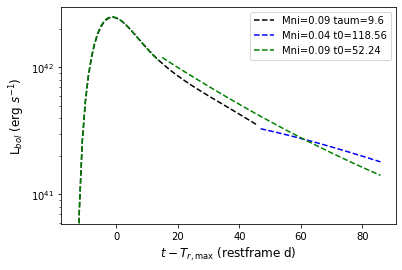

In [19]:
fig,ax=plt.subplots(1,1)
trise=-13.14

xx = np.arange(0,60,1)
yy = models.Arnett_fit_taum(xx, 0.09, 9.6)
ax.plot(xx+trise,yy,'k--',label='Mni=0.09 taum=9.6')

print (models.Mej_Ek_to_taum(0.66, 0.15), 
       models.Mej_Ek_to_t0(0.66, 0.15),
       models.Mej_Ek_to_vej(0.66, 0.15))
#yy = models.Arnett_fit_taum(xx, 0.1, 9.83)
#ax.plot(xx+trise,yy,'r--')

xx = np.arange(0,28,1)
yy = models.Arnett_fit_taum(xx, 0.09, 9.48)
ax.plot(xx+trise,yy,'g--')

#trise=-13.93
#xx = np.arange(0,60,1)
#yy = models.Arnett_fit_taum(xx, 0.09, 10.6)
#ax.plot(xx+trise,yy,'r--',label='Mni=0.09 taum=10.6 tr=13.9')

xx = np.arange(60,100,1)
yy = models.tail_fit_t0(xx, 0.04, 118.56)
ax.plot(xx+trise,yy,'b--',label='Mni=0.04 t0=118.56')

xx = np.arange(28,100,1)
yy = models.tail_fit_t0(xx, 0.09, 52.24)
ax.plot(xx+trise,yy,'g--',label='Mni=0.09 t0=52.24')

#yy = models.tail_fit_t0(xx, 0.10, 45.58)
#ax.plot(xx+trise,yy,'r--',label='Arnett+tail')

ax.set_yscale('log')
ax.set_xlabel('$t - T_{r,\mathrm{max}} \; (\mathrm{restframe \; d})$',fontsize=12)
ax.set_ylabel('L$_{bol}$ (erg $s^{-1}$)',fontsize=12)
ax.legend()

(3.202705933479858, 1.9557380587635727)

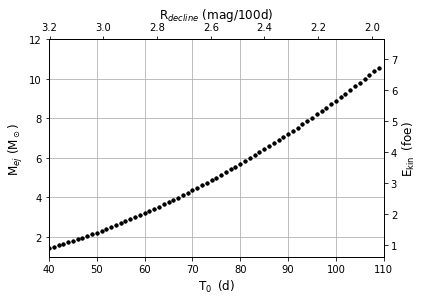

In [20]:
def t0_to_Mej_Ek(t0, vej):
    vej *= 1e8
    t0 *= 86400.
    Mej = 0.5*vej**2*t0**2/models.constants.C/models.constants.k_gamma
    Ekin = 0.25*vej**4*t0**2/models.constants.C/models.constants.k_gamma 
    return Mej/models.constants.M_sun, Ekin/1e51
vej = 8
fig,ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()
ax3 = ax1.twiny()
for t0 in np.arange(40,110,1):
    mej, ek = t0_to_Mej_Ek(t0, vej)
    ax1.plot(t0,mej,'k.')
    ax2.plot(t0,ek,'k.')
ax1.grid(True)
ax1.set_xlabel('T$_\mathrm{0 \;}$ (d)',fontsize=12)
ax3.set_xlabel('R$_{decline}$ (mag/100d)',fontsize=12)
ax2.set_ylabel('E$_\mathrm{kin \;}$ (foe)',fontsize=12)
ax1.set_ylabel('M$_{ej}$ (M$_\odot$)',fontsize=12)
mej1, mej2 = 1, 12
ax1.set_ylim([mej1, mej2])
def mej_to_ek(mej, vej):
    vej *= 1e8
    mej *= models.constants.M_sun
    return vej**2*mej/2/1e51
ax2.set_ylim([mej_to_ek(mej1, vej), mej_to_ek(mej2, vej)])
for _ in [ax1,ax2]: _.set_xlim(40,110)
ax3.set_xlim(3.202705933479858, 1.9557380587635727)

In [10]:
models.taum_to_Mej_Ek(10, 8)

(1.1462500538373692, 0.7295652342664087)

In [11]:
models.Mej_Ek_to_taum(0.66,0.15)

9.816160318460453

In [13]:
models.Mej_Ek_to_vej(0.66,0.15)

4.780477385098126

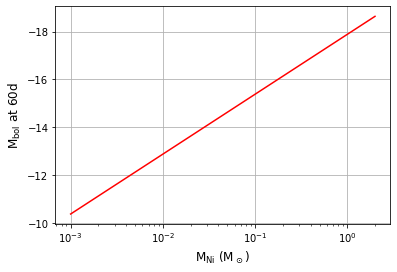

In [21]:
fig,ax=plt.subplots(1,1)
trise=-13.14
x,y=[],[]
xx = 60
for mni in np.arange(1e-3,2,1e-3):
    yy = functions.Lbol_to_Mbol(models.tail_fit_t0(xx, mni, 50))
    #ss = (max(yy)-min(yy)) / (max(xx)-min(xx)) * 100.
    x.append(mni)
    y.append(yy)
    #if t0 in [50,100]: print (mni, ss)
ax.plot(x,y,'r-')
ax.set_xlabel('M$_\mathrm{Ni}$ (M$_\odot$)',fontsize=12)
ax.set_ylabel('M$_\mathrm{bol}$ at 60d',fontsize=12)
ax.invert_yaxis()
ax.set_xscale('log')
plt.grid(True)

40 3.202705933479858
100 1.9557380587635727


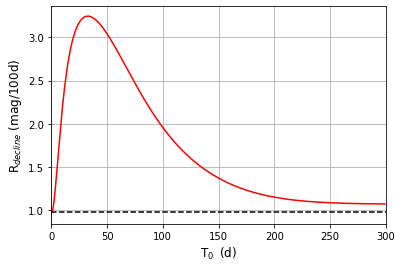

In [22]:
fig,ax=plt.subplots(1,1)
trise=-13.14
x,y=[],[]
xx = np.arange(40,120,1)
for t0 in np.arange(0,300,1):
    yy = functions.Lbol_to_Mbol(models.tail_fit_t0(xx, 0.09, t0))
    ss = (max(yy)-min(yy)) / (max(xx)-min(xx)) * 100.
    x.append(t0)
    y.append(ss)
    if t0 in [40,100]: print (t0, ss)
ax.plot(x,y,'r-')
ax.plot([0,300],[.98,.98],'k--')
ax.set_xlabel('T$_\mathrm{0 \;}$ (d)',fontsize=12)
ax.set_ylabel('R$_{decline}$ (mag/100d)',fontsize=12)
ax.set_xlim([0,300])
plt.grid(True)

NameError: name 'ztfp' is not defined

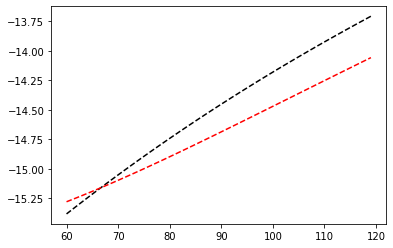

In [16]:
fig,ax=plt.subplots(1,1)
trise=-13.14
xx = np.arange(60,120,1)
yy = functions.Lbol_to_Mbol(models.tail_fit_t0(xx, 0.1, 50))
ax.plot(xx,yy,color='k',ls='--',label='mni=0.1 T0=50')
yy = functions.Lbol_to_Mbol(models.tail_fit_t0(xx, 0.05, 100))
ax.plot(xx,yy,color='r',ls='--',label='mni=0.05 T0=100')
xx = ztfp.data['ZTF20aajcdad'].mbol[1][0] - ztfp.data['ZTF20aajcdad'].t0 - trise
yy = functions.Lbol_to_Mbol(ztfp.data['ZTF20aajcdad'].mbol[1][1])
yye = abs(functions.Lbol_to_Mbol(ztfp.data['ZTF20aajcdad'].mbol[1][1]+ztfp.data['ZTF20aajcdad'].mbol[1][2]) - yy)
ax.errorbar(xx,yy,yerr=yye,color='g',marker='o',fillstyle='none',ls='')
ax.invert_yaxis()
ax.legend()

# all tasks with ztfmultiple
### set parameters for specific object in prior.txt file

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


meta 142 objs
Prepare data in = 1.03 s
Run GP in = 0.53 s


NameError: name 'fit_pars' is not defined

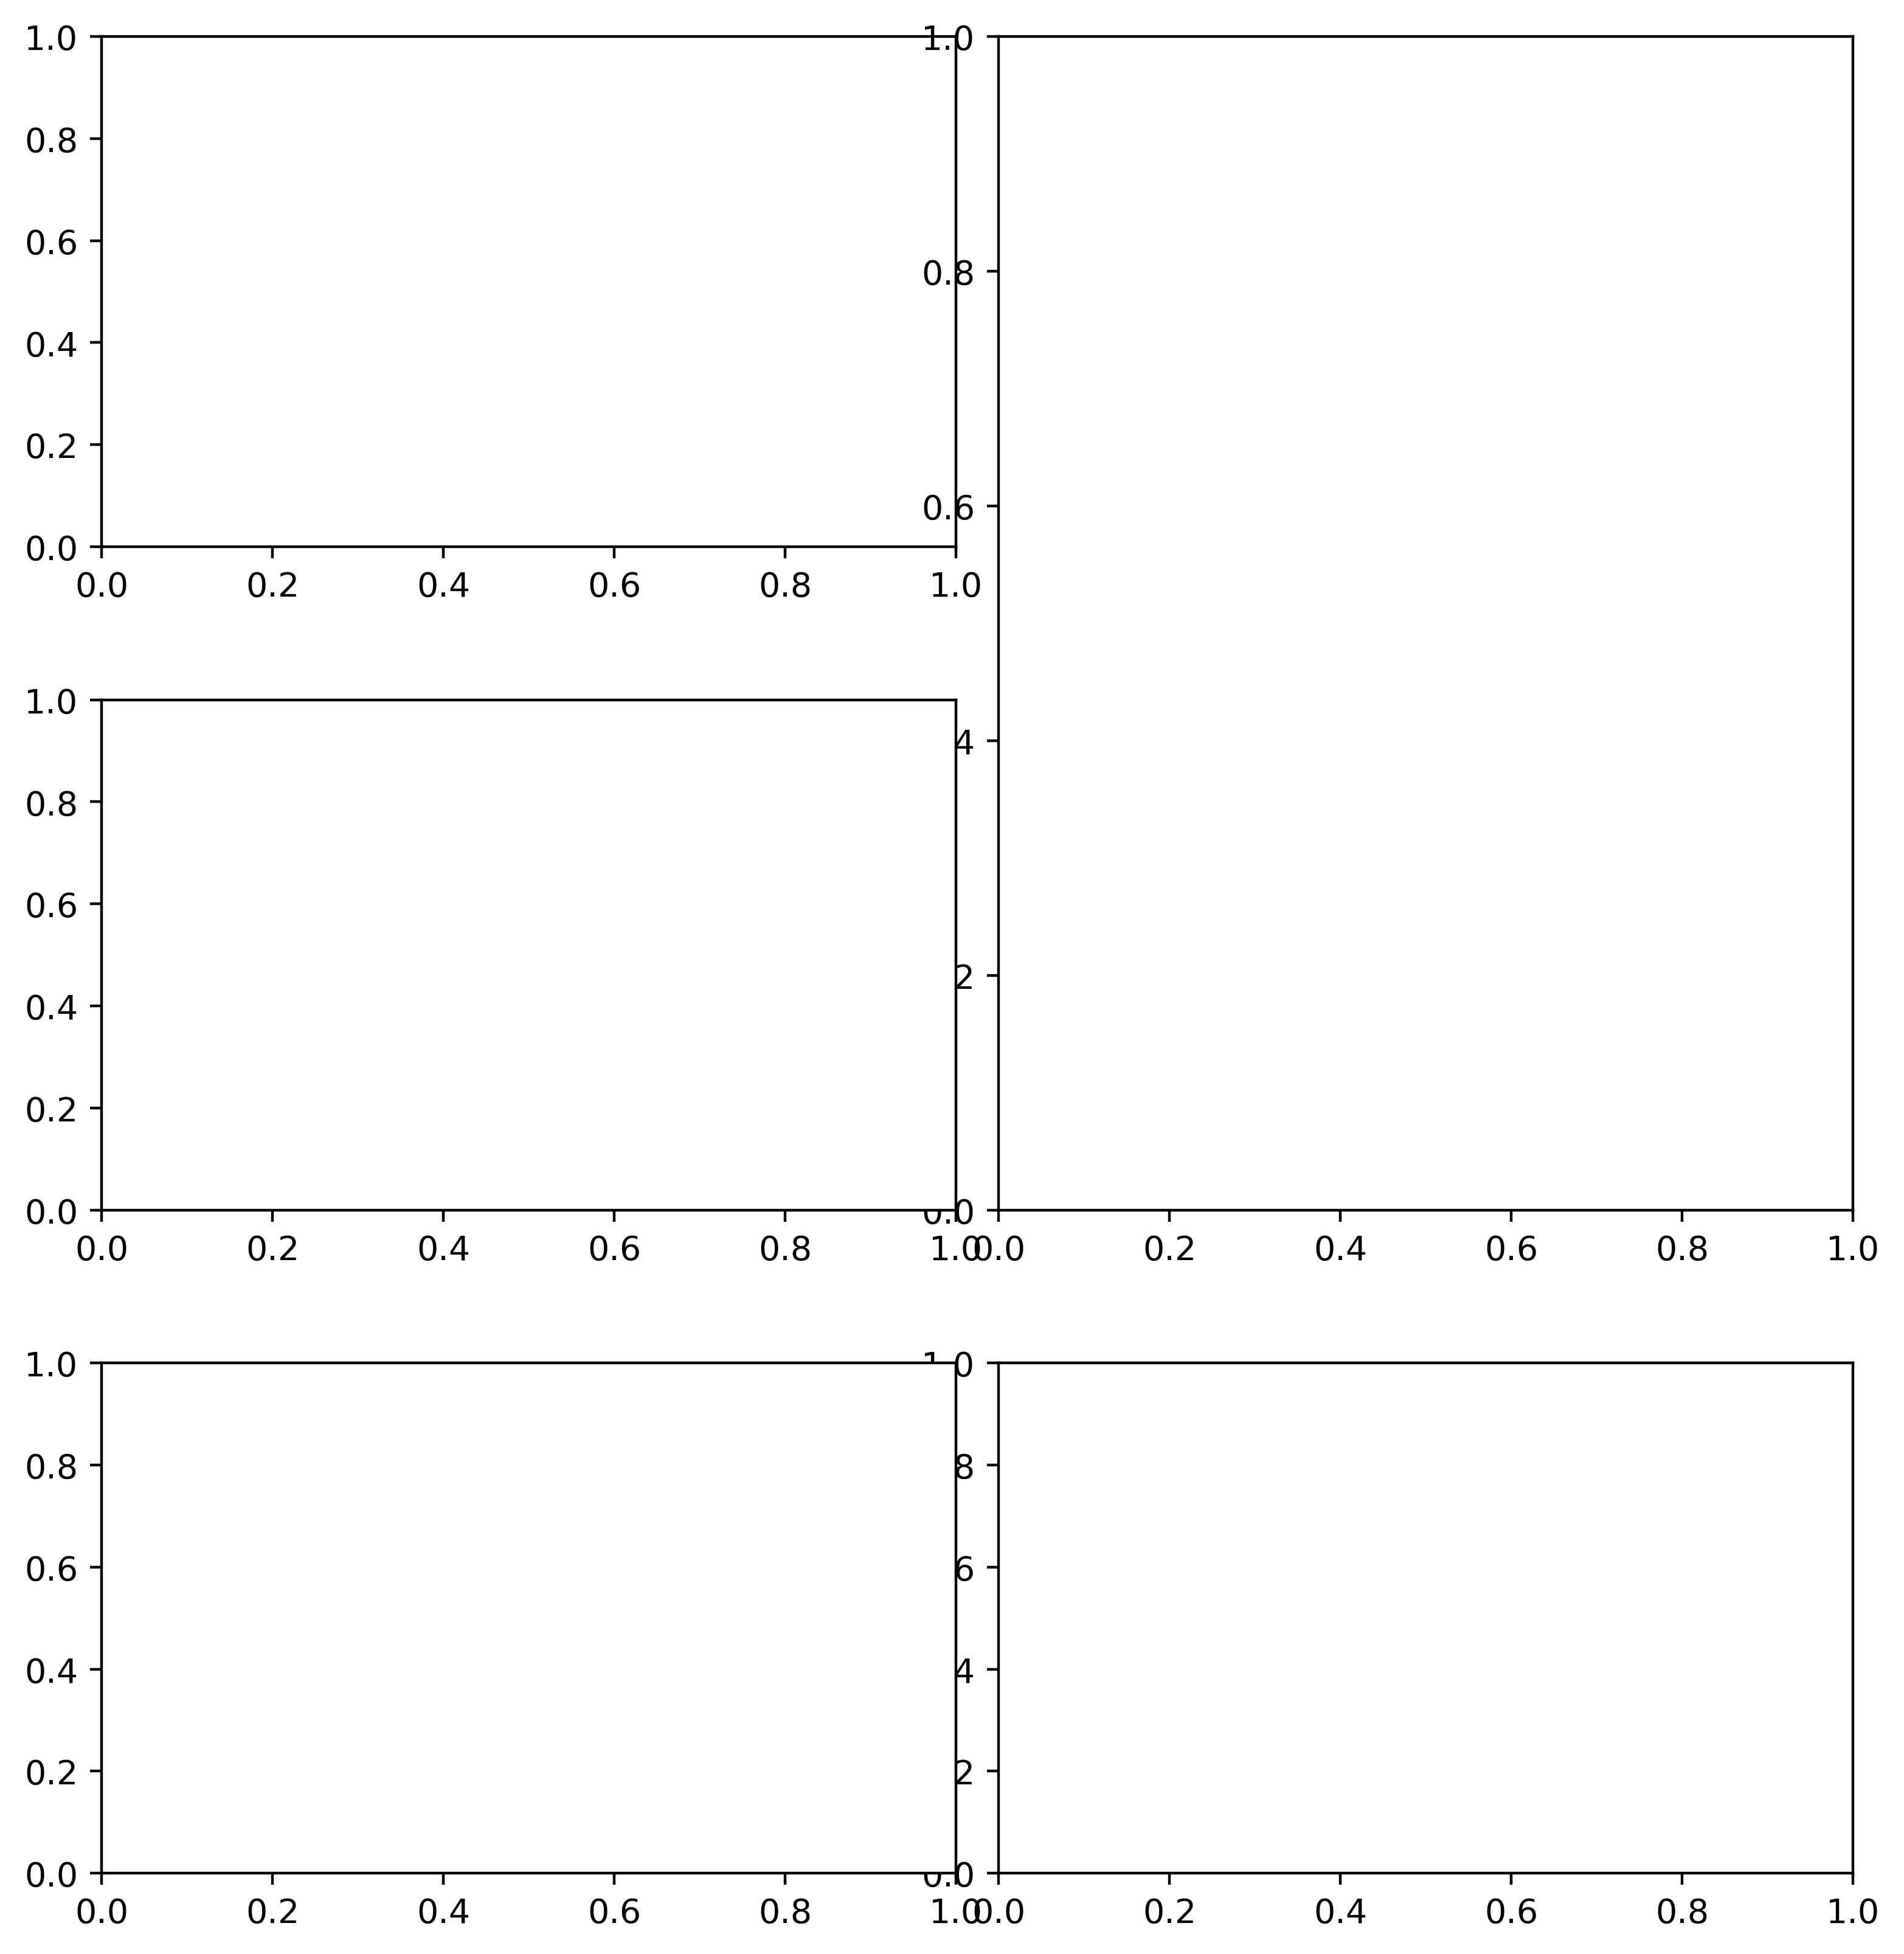

In [17]:
ztfp = ztfanalysis.ztfmultiple()
ztfp.run(ztfid='ZTF20aajcdad', verbose=False, clobber=True, axes=None)

In [3]:
ztfp.data['ZTF20aajcdad'].__dict__.keys()

dict_keys(['kwargs', 'ztfid', 'iauid', 'ra', 'dec', 'z', 'mkwebv', 'hostebv', 'sntype', 'dm', 't0', 'tpeak', 'fpeak', 'axes', 'fig', 'ax', 'ax1', 'ax2', 'ax3', 'ax4', 'lc', 'ndets', 'ncolors', 'peakphot', 'earlypoints', 'cw', 'region', 'c10_temp', 'gpcls', 'texp', 'fitcls', 'fit_theta', 'fit_rtheta', 'plcls', 'pl_theta', 'pl_rtheta', 'colors', 'lc_match', 'mbol', 'arnettcls', 'arnett_theta', 'arnett_rtheta', 'tailcls', 'tail_theta', 'tail_rtheta', 'jointcls', 'joint_theta', 'joint_rtheta', 'spec', 'specls'])

In [5]:
ztfp.data['ZTF20aajcdad'].arnettcls.get_par()

([0.09432596521731057, 9.428161274375132],
 [0.09644995815169498, 9.65678412523245],
 [0.09853141535376302, 9.885168637341001])

In [4]:
ztfp.data['ZTF20aajcdad'].jointcls.get_par()

([0.09045994782435125,
  0.10450880932046767,
  0.5611344464949515,
  1.4282648577822108],
 [0.09541237499235983,
  0.15196917944079985,
  0.6601066995031468,
  1.7250932835800539],
 [0.1008764411964283,
  0.33294357517844764,
  0.9044735783887877,
  2.135212125277477])

In [4]:
ztfp.data['ZTF20aajcdad'].specls

{'25.31': <sdapy.specline_fits.handle_spectrum at 0x7fa51b44ecf8>,
 '5.68': <sdapy.specline_fits.handle_spectrum at 0x7fa51e8ab4a8>,
 '-1.19': <sdapy.specline_fits.handle_spectrum at 0x7fa51e88e400>,
 '-3.16': <sdapy.specline_fits.handle_spectrum at 0x7fa51e88ea20>,
 '-7.08': <sdapy.specline_fits.handle_spectrum at 0x7fa51e89a3c8>,
 '-11.01': <sdapy.specline_fits.handle_spectrum at 0x7fa51e8a3b70>,
 '-11.99': <sdapy.specline_fits.handle_spectrum at 0x7fa51e8a3c88>}

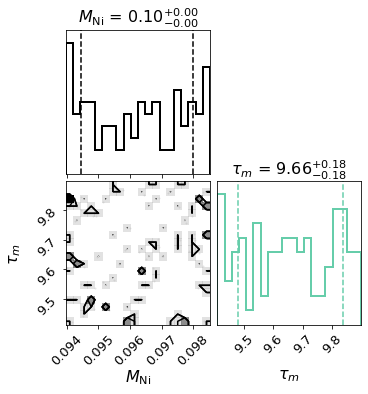

In [4]:
ztfp.data['ZTF20aajcdad'].corner(which='arnett_fit_taum', limit=0,)

In [3]:
from sdapy import models
models.Mej_Ek_to_taum(.66, .15)

9.816160318460453

# use ztfsingle to do fits step by step

### redshift, distance module and milky way ebv is needed

In [48]:
objname = 'ZTF20aajcdad'
ztfp = ztfanalysis.ztfmultiple(datadir='/Users/yash0613/Library/CloudStorage/Box-Box/ztf_data/',
                   metafile='rcf_query.txt')
ztfp.parse_meta()
ztfp.format_meta()

print (ztfp.meta['IAUID'][objname], ztfp.meta['redshift'][objname], ztfp.meta['dm'][objname], 
       ztfp.meta['ebv'][objname], ztfp.meta['peakt'][objname] + 2458000, )

meta 142 objs
SN2020bcq 0.018609999999999998 34.60827841693041 0.013870967741935483 2458888.02


In [45]:
ztfp.parse_meta_info('ZTF20aajcda', key='IAUID', test=True)

In [50]:
ztfp = ztfanalysis.ztfsingle(ztfid='ZTF20aajcdad', iauid='SN2020bcq', z=0.0186, dm=34.6, mkwebv=0.01387, sntype='SN Ib')

In [58]:
import matplotlib as mpl
mpl.use('Agg') 
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
mpl.rcParams['figure.figsize'] = [10, 8]
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['text.usetex'] = False
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Computer Modern Roman'
mpl.rcParams['lines.linewidth'] = 1.25
mpl.rcParams['lines.markersize'] = 6

plt.plot([1,2,3],[1,2,3],'ko')

'/opt/miniconda3/envs/ampelexports/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

### show flux and mag plots

detection epochs: {'g': 99, 'r': 106, 'i': 73} 
color epochs: {'g r': 96, 'g i': 77, 'r g': 102, 'r i': 83, 'i g': 67, 'i r': 68} 
early detections from 10% to 40% of peak: {}


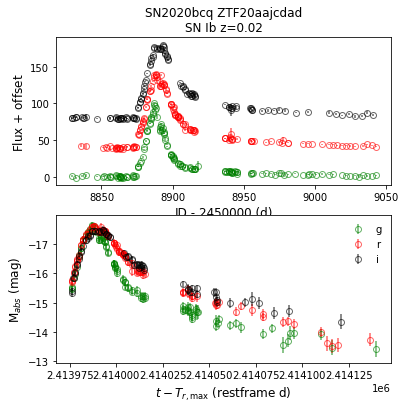

In [7]:
# initialize class
ztfp = ztfanalysis.ztfsingle(ztfid='ZTF20aajcdad', iauid='SN2020bcq', z=0.0186, dm=34.6, mkwebv=0.01387, sntype='SN Ib')

# get forced lightcurves
ztfp.get_fp_ztf()

# calculate Fmcmc and Fmcmc_unc from mags
ztfp.add_flux()

# remove lc outliers
ztfp.clip_lc()  

# check lc infos
ztfp.check_lc(jdthre=1, plot_bands=['g','r','i'])
print ('detection epochs:', ztfp.ndets, 
       '\ncolor epochs:', ztfp.ncolors, 
       '\nearly detections from 10% to 40% of peak:', ztfp.earlypoints)

# create 2 plots
fig,(ax, ax2)=plt.subplots(2,1)
ztfp.fig = fig
ztfp.ax = ax
ztfp.ax2 = ax2

# show
ztfp.plot(plot_bands=['g','r','i'], figsize=(6,6))

### run gaussian process

t0 =  0
after GP, t0 =  2458887.7244662875


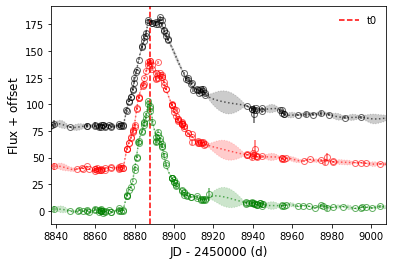

In [8]:
ztfp.run_gp(gp_type=1, 
            gp_routine='mcmc', 
            gp_mean='bazin', 
            kernel='matern32', 
            fix_scale=True,
            gp_fitr=[-60, 120], 
            gp_plotr=[-30, 120], 
            gp_bands=['g','r','i']
           )
print ('t0 = ',ztfp.t0)

ztfp.set_t0_withgp(filt='r') # set t0 with GP in r band
print ('after GP, t0 = ',ztfp.t0)

ztfp.fig, ztfp.ax = plt.subplots(1,1)
ztfp.plot(plot_bands=['r', 'g', 'i'], show_title=False, figpath='%s_gp',figsize=(6,4))

### run sn lc fits with mc

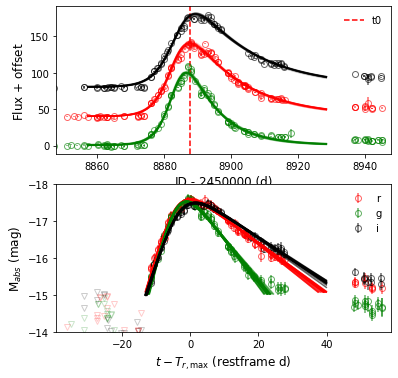

In [9]:
ztfp.run_fit(fit_type=1, 
            fit_routine='mcmc', 
            fit_bands=['i','g','r'],
            fit_mean='bazin', 
            fit_fitr=[-50, 50], 
            fit_plotr=[-50, 120], 
            nsteps=20000,
            nsteps_burnin=2000,
            verbose=False
           )
ztfp.fig, (ztfp.ax, ztfp.ax2)=plt.subplots(2,1)
ztfp.plot(gp_type=3, plot_bands=['r', 'g', 'i'], figpath='%s_fit',
          show_title=False, ax_xlim=[-40,60], ax2_ylim=[-14,-18], figsize=[6,6])

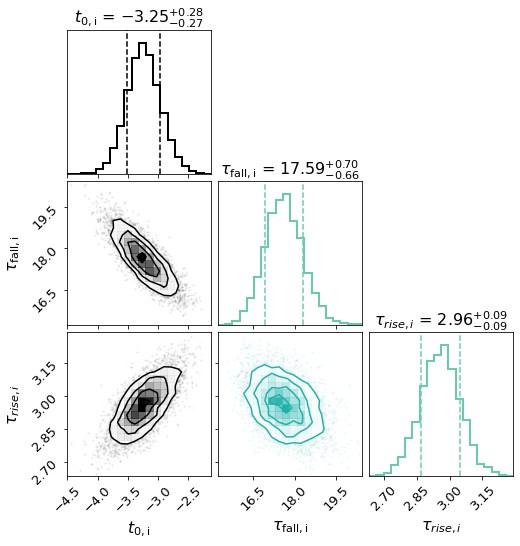

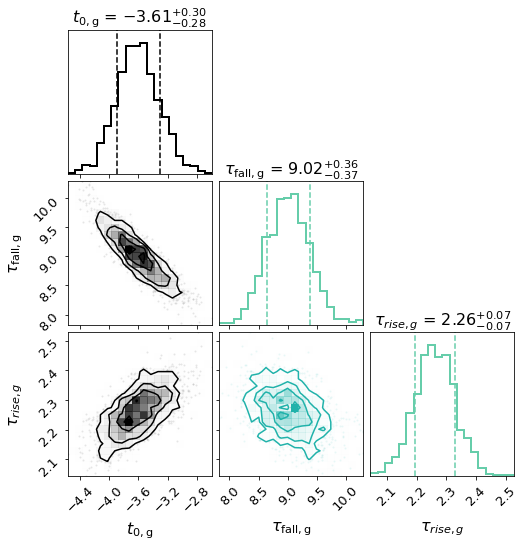

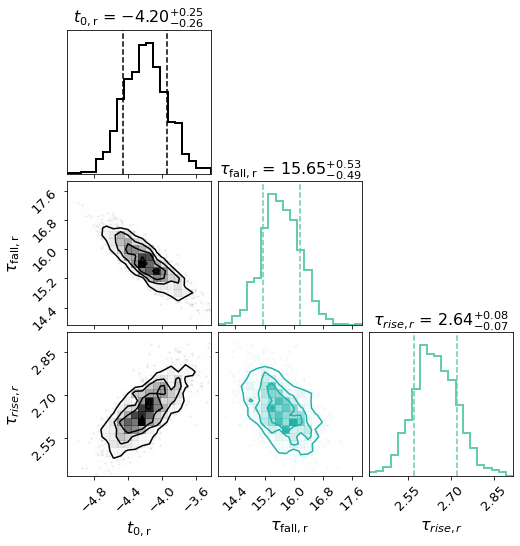

In [10]:
#parameter distribution
ztfp.corner(show=True, which='fit')

### run sn lc fits with scipy.optimize

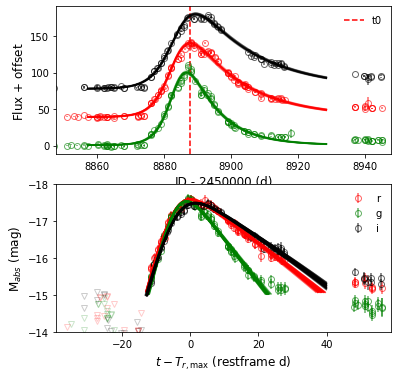

In [11]:
ztfp.run_fit(fit_type=1, 
            fit_routine='lm', 
            fit_bands=['r', 'g', 'i'],
            fit_mean='bazin', 
            fit_fitr=[-50, 50], 
            fit_plotr=[-50, 120], 
            nsteps=100,
            verbose=False
           )
ztfp.fig, (ztfp.ax, ztfp.ax2)=plt.subplots(2,1)
ztfp.plot(gp_type=3, plot_bands=['r', 'g', 'i'], figpath='%s_fit',
          show_title=False, ax_xlim=[-40,60], ax2_ylim=[-14,-18], figsize=[6,6])

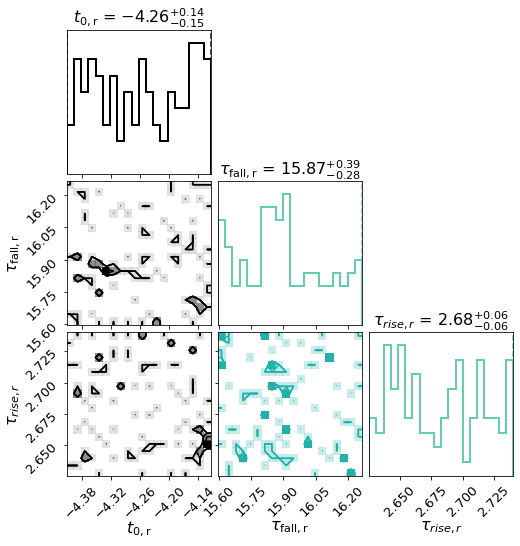

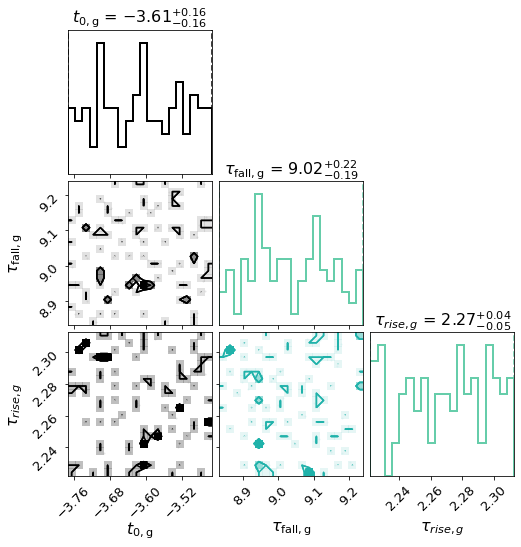

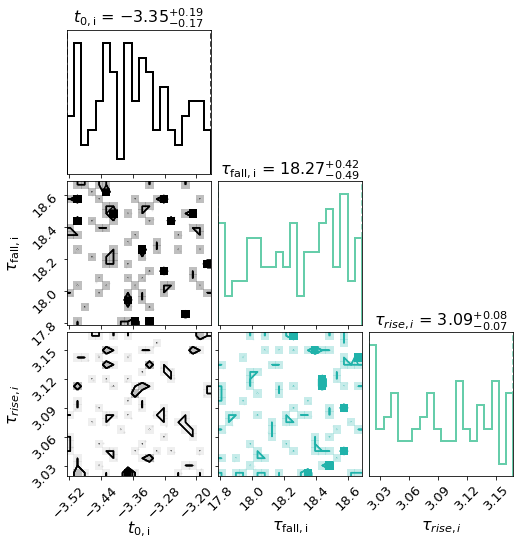

In [12]:
# parameter distribution
ztfp.corner(show=True, which='fit',quantile=[0,1])

### OK, let's put them together...

In [13]:
filt = 'r'
ztfp.run_fit(fit_type=1, 
            fit_routine='mcmc', 
            fit_bands=['i','g','r'],
            fit_mean='bazin', 
            fit_fitr=[-50, 50], 
            fit_plotr=[-50, 120], 
            nsteps=20000,
            nsteps_burnin=2000,
            verbose=False
           )
samples = ztfp.filter_samples(ztfp.fitcls[filt].samples, ztfp.fitcls[filt].lnprob)
theta = np.zeros((np.shape(samples)[0],3))
for n, alpha  in enumerate([1,2,3]): theta[:,n] = samples[:,alpha]
paramsNames = [r'$t_\mathrm{0,%s}$'%filt,
            r'$\tau_\mathrm{fall,%s}$'%filt, r'$\tau_{rise,%s}$'%filt]

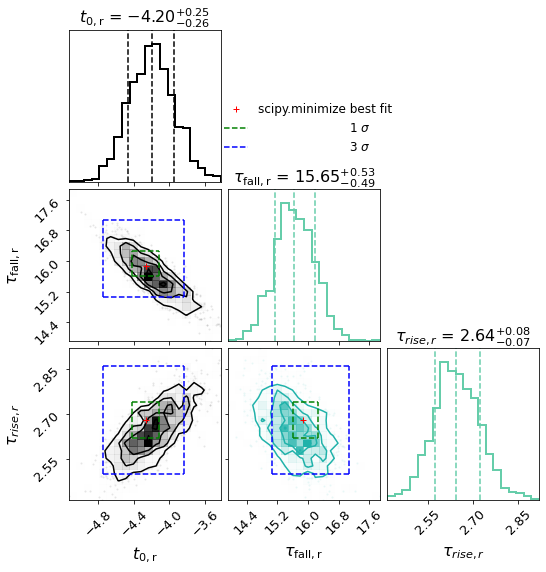

In [14]:
from sdapy.corner_hack import corner_hack
fig,((ax11,ax12,ax13),(ax21,ax22,ax23),(ax31,ax32,ax33))=plt.subplots(3, 3, figsize=(8, 8))
cfig = corner_hack(theta, labels=paramsNames, 
            label_kwargs={'fontsize':16}, ticklabelsize=13,
            show_titles=True, quantiles=[0.16, 0.50, 0.84],
            title_fmt=".2f", title_kwargs={'fontsize':16},
            plot_datapoints=True, plot_contours=True, fig=fig)
def plot_box(ax,x1,x2,y1,y2,color='g',label=None):
    ax.vlines(x=x1,ymin=y1,ymax=y2,color=color,ls='--',label=label)
    ax.vlines(x=x2,ymin=y1,ymax=y2,color=color,ls='--')
    ax.hlines(y=y1,xmin=x1,xmax=x2,color=color,ls='--')
    ax.hlines(y=y2,xmin=x1,xmax=x2,color=color,ls='--')
    
ax21.plot(-4.26, 15.87, 'r+', label='scipy.minimize best fit')
plot_box(ax21, -4.26-.16, -4.26+.14, 15.87-.27, 15.87+.40, label=' '*24+r'1 $\sigma$')
ax31.plot(-4.26, 2.68, 'r+')
plot_box(ax31, -4.26-.16, -4.26+.14, 2.68-.06, 2.68+.06)
ax32.plot(15.87, 2.68, 'r+')
plot_box(ax32, 15.87-.27, 15.87+.40, 2.68-.06, 2.68+.06)

plot_box(ax21, -4.26-.16*3, -4.26+.14*3, 15.87-.27*3, 15.87+.40*3, color='b', label=' '*24+r'3 $\sigma$')
plot_box(ax31, -4.26-.16*3, -4.26+.14*3, 2.68-.06*3, 2.68+.06*3, color='b')
plot_box(ax32, 15.87-.27*3, 15.87+.40*3, 2.68-.06*3, 2.68+.06*3, color='b')
ax21.legend(loc = 'center right', bbox_to_anchor = (2.2, 1.4), ncol=1, numpoints=1, fontsize=12, frameon=False)
cfig.savefig('ZTF20aajcdad_bazin_r_corner.png', bbox_inches='tight')

### run power law for first light

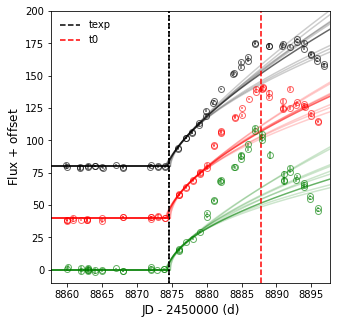

In [15]:
ztfp.explosion_pl(pl_type=1, 
            pl_routine='mcmc', 
            pl_bands=['r', 'g', 'i'],
            nsteps=40000,
            nsteps_burnin=2000,
            nwalkers=100,
            rel_flux_cutoff=.4,
            verbose=False,
           )
ztfp.fig, ztfp.ax=plt.subplots(1,1)
ztfp.plot(gp_type=3, fit_type=3, pl_plotmax=10, ax_ylim=[-10,200], ax_xlim=[-30,10],show_title=False,
          plot_bands=['r', 'g', 'i'], pl_bands=['r', 'g', 'i'], figsize=(5,5), figpath='%s_pl')

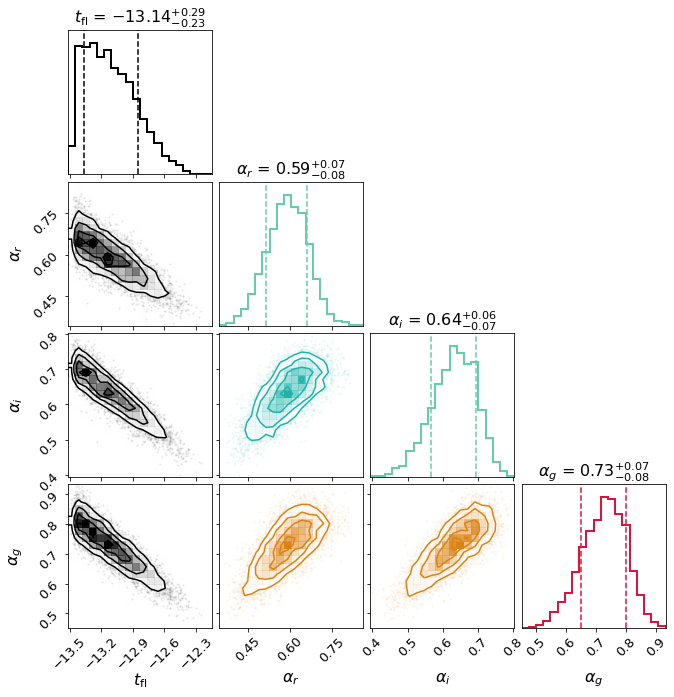

In [16]:
#parameter distribution
ztfp.corner(show=True, which='pl', pl_bands=['r','i','g'], limit=.8, figpath='ZTF20aajcdad_pl_corner')

### make bolometric LCs

##### Lyman et al 2014, 2016

In [17]:
# 1: colors with both filter available within 24 hours
# 2: epochs with one band available, and the other from fit intepolated
# 3: epochs with one band available, and the other from GP intepolated
ztfp.calc_colors(copt=[1,2,3], cfilt1='g', cfilt2='r', color_thre=1.)

In [18]:
ztfp.sntype = 'SN Ib'
ztfp.on_sntype() # get template g-r for Ib from SDSS samples

print ('host ebv=', ztfp.hostebv)
ztfp.est_host_c10()
print ('After comparing to template, host ebv=', ztfp.hostebv)

host ebv= 0
After comparing to template, host ebv= 0.0


In [19]:
ztfp.lyman_bol(lyman_copt=[1,2,3])

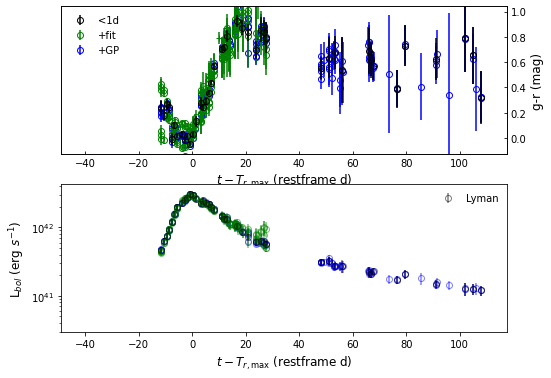

In [20]:
ztfp.fig,(ztfp.ax3, ztfp.ax4)=plt.subplots(2,1)
ztfp.plot(fit_plotr=[-30, 40], figsize=(8,6))

##### diluted blackbody

In [21]:
ztfp.bb_colors(cfilters=['g','r','i'], bb_copt=[1,2,3])

In [22]:
ztfp.bb_bol(bb_copt=[1,2,3])

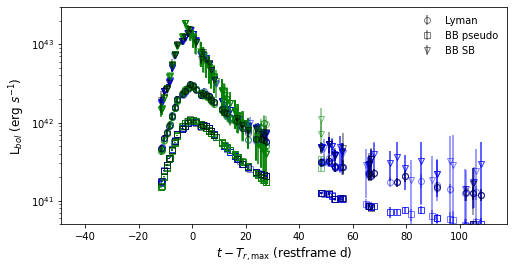

In [23]:
ztfp.fig, ztfp.ax4 =plt.subplots(1,1)
ztfp.plot(fit_plotr=[-30, 40], bolopt=[1,2], figsize=(8,4), ax4_ylim=[5e40,3e43])

### Arnett fits on Mni and taum in monte carlo mode

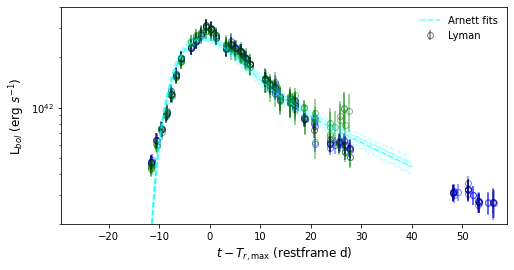

In [24]:
ztfp.arnett_fit(Arnett_type=1, 
            Arnett_style=1,
            Arnett_routine='mcmc',  
            Arnett_fitr=[-30, 40], 
            fit_plotr=[-50, 120], 
            nsteps=20000,
            verbose=False
           )
ztfp.fig, ztfp.ax4 = plt.subplots(1,1)
ztfp.plot(show_title=False, figsize=(8,4), figpath='ZTF20aajcdad_arnett',
          ax_xlim=[-30,60], ax4_ylim=[2e41,4e42])

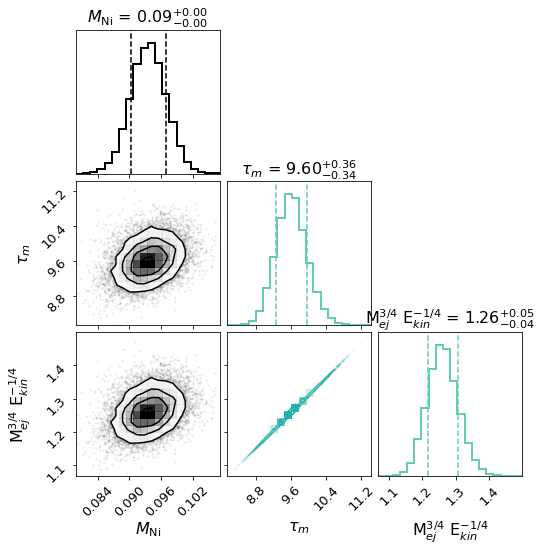

In [25]:
# parameter distribution
ztfp.corner(show=True, which='arnett', figpath='ZTF20aajcdad_arnett_corner1',)

### Arnett fits on Mni, Ek and Mej without explosion epoch

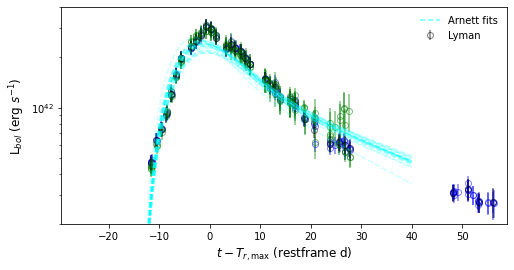

In [26]:
ztfp.arnett_fit(Arnett_type=1, 
            Arnett_style=3,
            Arnett_routine='mcmc',  
            Arnett_fitr=[-30, 40], 
            fit_plotr=[-50, 120], 
            nsteps=20000,
            nsteps_burnin=5000,
            verbose=False
           )
ztfp.fig, ztfp.ax4 = plt.subplots(1,1)
ztfp.plot(show_title=False, figsize=(8,4), figpath='ZTF20aajcdad_arnett',
          ax_xlim=[-30,60], ax4_ylim=[2e41,4e42])

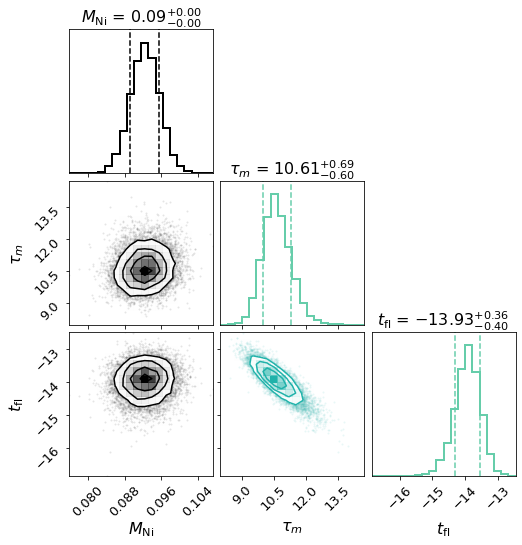

In [27]:
# parameter distribution
ztfp.corner(show=True, which='arnett_fitt', figpath='ZTF20aajcdad_arnett_corner2',)

### Tail fits with monte carlo

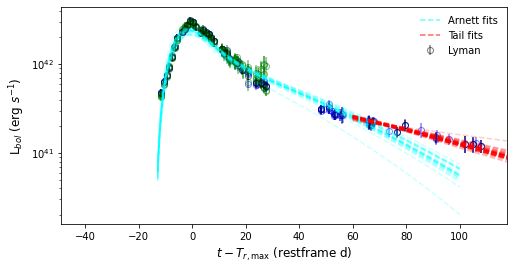

In [28]:
ztfp.tail_fit(Tail_type=1, 
            Tail_routine='mcmc',  
            Tail_fitr=[60, 100], 
            fit_plotr=[60, 120], 
            nsteps=20000,
            nsteps_burnin=2000,
            verbose=False
           )
ztfp.fig, ztfp.ax4 = plt.subplots(1,1)
ztfp.plot(Arnett_type=3, fit_plotr=[-50, 200], Arnett_plotr=[-20,100], 
          figsize=[8,4], figpath='ZTF20aajcdad_tail',)

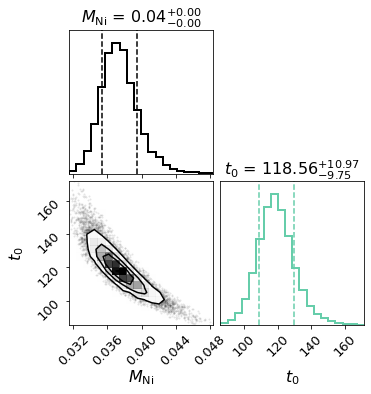

In [29]:
# parameter distribution
ztfp.corner(show=True, which='tail', limit=.6, figpath='ZTF20aajcdad_tail_corner',)

### create a json file for photometry

In [31]:
from sdapy.dump import *

a=CatGen('ZTF20aajcdad')
a.add_lumdist(83.494, lumdist_err=None)

In [32]:
for _ in ztfp.lc.index:
    jd, mag, mag_err, limmag, band = ztfp.lc['jdobs'][_], ztfp.lc['mag'][_], ztfp.lc['emag'][_], ztfp.lc['limmag'][_], ztfp.lc['filter'][_]
    if mag == 99: 
        continue
        #a.add_photometry_point(jd - 2400000.5, 'P48', 'P48', band, limmag, None, 'AB')
    else:
        a.add_photometry_point(jd - 2400000.5, 'P48', 'P48', band, mag, mag_err, 'AB')
a.dump_json('tmp.json')

### gaussian minimum for spectral lines

In [33]:
ztfp.get_local_spectra()

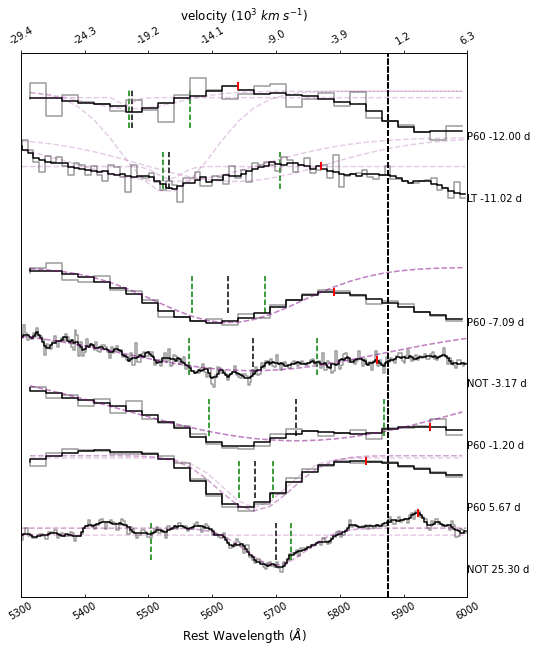

In [34]:
ztfp.fig, ztfp.ax1 = plt.subplots(1,1)
ztfp.meas_specline()
ztfp.plot()